# Case Study 1 : Data Science in Yelp Data

**Required Readings:** 
* [Yelp Open Dataset](https://www.yelp.com/dataset) 
* Please download the Yelp dataset from the above webpage.

**NOTE**
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.


Here is an example of the data format. More details are included [here](https://www.yelp.com/dataset/documentation/main)

## Business 

'business.json' contain information about local businesses.

```json
{
    // string, 22 character unique string business id
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // string, the business's name
    "name": "Garaje",

    // string, the full address of the business
    "address": "475 3rd St",

    // string, the city
    "city": "San Francisco",

    // string, 2 character state code, if applicable
    "state": "CA",

    // string, the postal code
    "postal code": "94107",

    // float, latitude
    "latitude": 37.7817529521,

    // float, longitude
    "longitude": -122.39612197,

    // float, star rating, rounded to half-stars
    "stars": 4.5,

    // integer, number of reviews
    "review_count": 1198,

    // integer, 0 or 1 for closed or open, respectively
    "is_open": 1,

    // object, business attributes to values. note: some attribute values might be objects
    "attributes": {
        "RestaurantsTakeOut": true,
        "BusinessParking": {
            "garage": false,
            "street": true,
            "validated": false,
            "lot": false,
            "valet": false
        },
    },

    // an array of strings of business categories
    "categories": [
        "Mexican",
        "Burgers",
        "Gastropubs"
    ],

    // an object of key day to value hours, hours are using a 24hr clock
    "hours": {
        "Monday": "10:00-21:00",
        "Tuesday": "10:00-21:00",
        "Friday": "10:00-21:00",
        "Wednesday": "10:00-21:00",
        "Thursday": "10:00-21:00",
        "Sunday": "11:00-18:00",
        "Saturday": "10:00-21:00"
    }
}
```
## Reviews
```json
{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

The problem we are trying to solve is to compare the low rated restaurants with the high rated restaurants. We will be analyzing the factors that contribute for the increase in the average rating of the restaurants. Thereby, through our casestudy, we will be helping the low rated restaurants and providing them with some suggestions to improve their ratings.


# Data Collection/Processing: 

In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_colwidth', -1)

In [3]:
business_df = []
# reading business file
business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [4]:
checkins_df = []
# reading checkin file      
checkins_df = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)

In [5]:
# removing missing values
business_df = business_df[business_df['categories'].notna()]
# selecting only restaurants
restaurants = business_df[business_df['categories'].str.contains('Restaurants')]

In [6]:
restaurants=restaurants.reset_index(drop=True)

In [7]:
restaurants.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,404 E Green St,"{'RestaurantsAttire': 'u'casual'', 'RestaurantsTakeOut': 'True', 'BusinessAcceptsCreditCards': 'True', 'NoiseLevel': 'u'quiet'', 'GoodForKids': 'False', 'RestaurantsReservations': 'False', 'RestaurantsGoodForGroups': 'False', 'BusinessParking': 'None', 'RestaurantsPriceRange2': '1', 'HasTV': 'True', 'Alcohol': ''none'', 'BikeParking': 'False', 'RestaurantsDelivery': 'True', 'ByAppointmentOnly': 'False', 'OutdoorSeating': 'False'}",pQeaRpvuhoEqudo3uymHIQ,"Ethnic Food, Food Trucks, Specialty Food, Imported Food, Argentine, Food, Restaurants, Empanadas",Champaign,"{'Monday': '11:30-14:30', 'Tuesday': '11:30-14:30', 'Wednesday': '11:30-14:30', 'Thursday': '11:30-14:30', 'Friday': '11:30-14:30'}",1,40.110446,-88.233073,The Empanadas House,61820,5,4.5,IL
1,4508 E Independence Blvd,"{'RestaurantsGoodForGroups': 'True', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'GoodForKids': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'RestaurantsPriceRange2': '1', 'RestaurantsReservations': 'False', 'RestaurantsAttire': 'u'casual''}",CsLQLiRoafpJPJSkNX2h5Q,"Food, Restaurants, Grocery, Middle Eastern",Charlotte,None,0,35.194894,-80.767442,Middle East Deli,28205,5,3.0,NC
2,"15480 Bayview Avenue, unit D0110","{'RestaurantsTableService': 'False', 'RestaurantsDelivery': 'True', 'OutdoorSeating': 'False', 'DogsAllowed': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsReservations': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'HasTV': 'True', 'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'BikeParking': 'True', 'Caters': 'True'}",eBEfgOPG7pvFhb2wcG9I7w,"Restaurants, Cheesesteaks, Poutineries",Aurora,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22:0', 'Thursday': '11:0-22:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0', 'Sunday': '11:0-21:0'}",1,44.010962,-79.448677,Philthy Phillys,L4G 7J1,4,4.5,ON
3,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'Alcohol': 'u'none'', 'RestaurantsReservations': 'False', 'RestaurantsGoodForGroups': 'False', 'RestaurantsDelivery': 'True'}",lu7vtrp_bE9PnxWfA8g4Pg,"Japanese, Fast Food, Food Court, Restaurants",Thornhill,None,1,43.820492,-79.398466,Banzai Sushi,L3T 5W4,7,4.5,ON
4,13071 Yonge Street,"{'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}', 'DogsAllowed': 'False', 'Caters': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'RestaurantsTableService': 'True', 'Alcohol': 'u'full_bar'', 'HasTV': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}', 'RestaurantsDelivery': 'True', 'WiFi': 'u'free'', 'HappyHour': 'False', 'OutdoorSeating': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsReservations': 'True'}",9sRGfSVEfLhN_km60YruTA,"Persian/Iranian, Turkish, Middle Eastern, Restaurants, Kebab",Richmond Hill,"{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21:0', 'Thursday': '12:0-21:0', 'Friday': '12:0-0:0', 'Saturday': '12:0-0:0', 'Sunday': '11:0-21:0'}",1,43.947011,-79.454862,Apadana Restaurant,L4E 1A5,3,3.0,ON


### Analyzing Toronto Restaurant Data

In [8]:
# selecting Toronto Restaurants for Analysis
tor_restaurants = restaurants[restaurants['city'] == 'Toronto']
print(tor_restaurants.shape)
print(tor_restaurants.columns)

(8679, 14)
Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')


In [9]:
# dropping irrelevant columns
tor_restaurants = tor_restaurants.drop(['address', 'city', 'hours', 'latitude', 'longitude','postal_code','state'], axis=1)

In [10]:
# looking at data
tor_restaurants = tor_restaurants.reset_index(drop=True)
tor_restaurants.head()

,attributes,business_id,categories,is_open,name,review_count,stars
0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAttire': 'u'casual'', 'Alcohol': 'u'none'', 'Caters': 'False', 'HasTV': 'False', 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsDelivery': 'False', 'RestaurantsReservations': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'NoiseLevel': 'u'average'', 'WiFi': ''no'', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'OutdoorSeating': 'False'}",rVBPQdeayMYht4Uv_FOLHg,"Restaurants, Burgers, Food",0,Gourmet Burger Company,13,3.0
1,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'beer_and_wine'', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsAttire': 'u'casual'', 'RestaurantsDelivery': 'False', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'OutdoorSeating': 'False', 'NoiseLevel': 'u'average'', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}', 'WiFi': 'u'no'', 'BikeParking': 'True', 'RestaurantsTableService': 'True', 'HasTV': 'True', 'Caters': 'False'}",0QjROMVW9ACKjhSEfHqNCQ,"Vietnamese, Restaurants",1,Mi Mi Restaurant,116,4.0
2,"{'OutdoorSeating': 'False', 'RestaurantsDelivery': 'False', 'RestaurantsTakeOut': 'True', 'HasTV': 'True', 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsAttire': ''casual'', 'RestaurantsReservations': 'False', 'BikeParking': 'False', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}', 'RestaurantsPriceRange2': '1', 'WiFi': ''no'', 'Alcohol': ''none'', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}'}",8k62wYhDVq1-652YbJi5eg,"Bagels, Donuts, Food, Cafes, Coffee & Tea, Restaurants, Bakeries",1,Tim Hortons,8,3.0
3,"{'NoiseLevel': ''loud'', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}', 'RestaurantsTableService': 'False', 'RestaurantsTakeOut': 'True', 'BikeParking': 'True', 'Alcohol': ''none'', 'DriveThru': 'False', 'Caters': 'True', 'GoodForKids': 'True', 'RestaurantsAttire': 'u'casual'', 'RestaurantsPriceRange2': '2', 'RestaurantsGoodForGroups': 'True', 'RestaurantsDelivery': 'True', 'WiFi': ''no'', 'RestaurantsReservations': 'False', 'OutdoorSeating': 'True', 'HasTV': 'True'}",0DnQh8SE8BSnvJltGCCiWg,"Fast Food, Restaurants, Chicken Shop",1,Chick-N-Joy,11,3.0
4,"{'DogsAllowed': 'False', 'OutdoorSeating': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'BikeParking': 'True', 'WheelchairAccessible': 'True', 'RestaurantsPriceRange2': '1', 'Caters': 'False', 'WiFi': 'u'free''}",NLaK58WvlNQdUunSIkt-jA,"Coffee & Tea, Restaurants, Sandwiches, Food",1,Zav Coffee Shop & Gallery,24,4.5


Different restaurants have different attributes. Also, some of them have null attributes.

In [11]:
tor_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8679 entries, 0 to 8678
Data columns (total 7 columns):
attributes      8392 non-null object
business_id     8679 non-null object
categories      8679 non-null object
is_open         8679 non-null int64
name            8679 non-null object
review_count    8679 non-null int64
stars           8679 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 474.7+ KB


In [12]:
# marking none for empty
tor_restaurants['attributes'] = tor_restaurants['attributes'].apply(lambda x: {} if x is None else x)
# creating dataframe from attributes
attributes_df = json_normalize(tor_restaurants.attributes)

Checking which attributes are commonly present for Toronto Restaurants

In [13]:
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8679 entries, 0 to 8678
Data columns (total 37 columns):
AcceptsInsurance              2 non-null object
AgesAllowed                   2 non-null object
Alcohol                       6142 non-null object
Ambience                      6813 non-null object
BYOB                          81 non-null object
BestNights                    446 non-null object
BikeParking                   5294 non-null object
BusinessAcceptsBitcoin        2 non-null object
BusinessAcceptsCreditCards    272 non-null object
BusinessParking               7049 non-null object
ByAppointmentOnly             283 non-null object
Caters                        4697 non-null object
CoatCheck                     379 non-null object
Corkage                       56 non-null object
DietaryRestrictions           12 non-null object
DogsAllowed                   1103 non-null object
DriveThru                     304 non-null object
GoodForDancing                456 non-null obj

 Most Common (more than 6000)- 'Alcohol', 'Ambience', 'BusinessParking', 'GoodForKids',  'HasTV', 'OutdoorSeating', 'RestaurantsAttire',  'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsPriceRange2', 'RestaurantsReservations',
        'RestaurantsTakeOut'

In [14]:
# choosing attributes that look relevant
attributes_lst = ['Alcohol', 'BusinessParking', 'GoodForKids', 'HasTV', 'OutdoorSeating','RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsTakeOut']

Finding possible values for relevant  attributes - 

In [15]:
# each relevant attribute and its possible values
for i in attributes_lst:
    x = attributes_df[i].value_counts()
    print(i,x)

Alcohol u'full_bar'         2451
u'none'             2147
u'beer_and_wine'    715 
'none'              463 
'full_bar'          194 
'beer_and_wine'     166 
None                6   
Name: Alcohol, dtype: int64
BusinessParking {'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}     2884
{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}    2739
{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}     641 
{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}      215 
{'garage': True, 'street': True, 'validated': False, 'lot': False, 'valet': False}      110 
{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False}     95  
None                                                                                    88  
{'garage': True, 'street': True, 'validated': False, 'lot': True, 'valet': False}       32  
{'garage': False, 'street': F

Selecting only records that have relevant attrbutes values -

In [22]:
res_attr = pd.DataFrame()

# for each record in toronto restaurants
for i in range(0,len(tor_restaurants)):
    # splitting attributes
    atr = [i.split(':', 1)[0] for i in tor_restaurants['attributes'][i]]
    # checking attributes in our attribute list(most occurring)
    avlbl = [i for i in atr if i in attributes_lst]
    # if all mentioned attributes available
    if len(avlbl) == len (attributes_lst):
            # adding those records in new data frame
            res_attr = res_attr.append(tor_restaurants.loc[i])

res_attr.head(2)

,attributes,business_id,categories,is_open,name,review_count,stars
0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAttire': 'u'casual'', 'Alcohol': 'u'none'', 'Caters': 'False', 'HasTV': 'False', 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsDelivery': 'False', 'RestaurantsReservations': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'NoiseLevel': 'u'average'', 'WiFi': ''no'', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'OutdoorSeating': 'False'}",rVBPQdeayMYht4Uv_FOLHg,"Restaurants, Burgers, Food",0.0,Gourmet Burger Company,13.0,3.0
1,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'beer_and_wine'', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsAttire': 'u'casual'', 'RestaurantsDelivery': 'False', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'OutdoorSeating': 'False', 'NoiseLevel': 'u'average'', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}', 'WiFi': 'u'no'', 'BikeParking': 'True', 'RestaurantsTableService': 'True', 'HasTV': 'True', 'Caters': 'False'}",0QjROMVW9ACKjhSEfHqNCQ,"Vietnamese, Restaurants",1.0,Mi Mi Restaurant,116.0,4.0


In [24]:
res_attr = res_attr.reset_index(drop=True)
res_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 7 columns):
attributes      4683 non-null object
business_id     4683 non-null object
categories      4683 non-null object
is_open         4683 non-null float64
name            4683 non-null object
review_count    4683 non-null float64
stars           4683 non-null float64
dtypes: float64(3), object(4)
memory usage: 256.2+ KB


Creating Dataframe with relevant attribute columns with 0s -

In [43]:
attrColumnsDf = pd.DataFrame(0, index=np.arange(len(res_attr)), columns=attributes_lst)

In [44]:
attrColumnsDf.head()

,Alcohol,BusinessParking,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTakeOut
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


Updating values in relevant attribute dataframe based on values present in Toronto restaurants data -

In [45]:
for i in range(0,len(res_attr)):
    atr = [ [key,value] for key, value in res_attr['attributes'][i].items()]
    
    # Alcohol
    if (['Alcohol', 'none'] not in atr) or (['Alcohol', "u'none'"] not in atr):
        attrColumnsDf.at[i,'Alcohol']=1
        
    # BusinessParking
    parking = 'garage: False, street: False'
    for park in atr:
        if park[0] == 'BusinessParking':
            park = park[1].replace('\'', "")
            if parking in park:
                attrColumnsDf.at[i,'BusinessParking']=1
    
    # Good for kids
    if ['GoodForKids', 'True'] in atr:
        attrColumnsDf.at[i,'GoodForKids']=1
    
    # Has TV
    if ['HasTV', 'True'] in atr:
        attrColumnsDf.at[i,'HasTV']=1
      
    # Outdoor seating
    if ['OutdoorSeating', 'True'] in atr:
        attrColumnsDf.at[i,'OutdoorSeating']=1
    #RestaurantsDelivery    
    if ['RestaurantsDelivery', 'True'] in atr:
        attrColumnsDf.at[i,'RestaurantsDelivery']=1
    #RestaurantsGoodForGroups
    if ['RestaurantsGoodForGroups', 'True'] in atr:
        attrColumnsDf.at[i,'RestaurantsGoodForGroups']=1
        
    # Price Range
    if ['RestaurantsPriceRange2', '1'] in atr:
        attrColumnsDf.at[i,'RestaurantsPriceRange2']=1
    if ['RestaurantsPriceRange2', '2'] in atr:
        attrColumnsDf.at[i,'RestaurantsPriceRange2']=2
    if ['RestaurantsPriceRange2', '3'] in atr:
        attrColumnsDf.at[i,'RestaurantsPriceRange2']=3
    if ['RestaurantsPriceRange2', '4'] in atr:
        attrColumnsDf.at[i,'RestaurantsPriceRange2']=4
    
    # Reservations
    if ['RestaurantsReservations', 'True'] in atr:
        attrColumnsDf.at[i,'RestaurantsReservations']=1
        
    #  RestaurantsTakeOut          
    if ['RestaurantsTakeOut', 'True'] in atr:
        attrColumnsDf.at[i,'RestaurantsTakeOut']=1

In [46]:
# concatenating two dataframes
final_df = pd.concat([tor_restaurants, attrColumnsDf], axis=1, join='inner')
final_df.head(3)

,attributes,business_id,categories,is_open,name,review_count,stars,Alcohol,BusinessParking,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTakeOut
0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAttire': 'u'casual'', 'Alcohol': 'u'none'', 'Caters': 'False', 'HasTV': 'False', 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsDelivery': 'False', 'RestaurantsReservations': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'NoiseLevel': 'u'average'', 'WiFi': ''no'', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'OutdoorSeating': 'False'}",rVBPQdeayMYht4Uv_FOLHg,"Restaurants, Burgers, Food",0,Gourmet Burger Company,13,3.0,1,1,1,0,0,0,1,2,0,1
1,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'beer_and_wine'', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsAttire': 'u'casual'', 'RestaurantsDelivery': 'False', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'OutdoorSeating': 'False', 'NoiseLevel': 'u'average'', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}', 'WiFi': 'u'no'', 'BikeParking': 'True', 'RestaurantsTableService': 'True', 'HasTV': 'True', 'Caters': 'False'}",0QjROMVW9ACKjhSEfHqNCQ,"Vietnamese, Restaurants",1,Mi Mi Restaurant,116,4.0,1,0,1,1,0,0,1,1,0,1
2,"{'OutdoorSeating': 'False', 'RestaurantsDelivery': 'False', 'RestaurantsTakeOut': 'True', 'HasTV': 'True', 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsAttire': ''casual'', 'RestaurantsReservations': 'False', 'BikeParking': 'False', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}', 'RestaurantsPriceRange2': '1', 'WiFi': ''no'', 'Alcohol': ''none'', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}'}",8k62wYhDVq1-652YbJi5eg,"Bagels, Donuts, Food, Cafes, Coffee & Tea, Restaurants, Bakeries",1,Tim Hortons,8,3.0,1,1,1,1,0,0,1,1,0,1


In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4683 entries, 0 to 4682
Data columns (total 17 columns):
attributes                  4683 non-null object
business_id                 4683 non-null object
categories                  4683 non-null object
is_open                     4683 non-null int64
name                        4683 non-null object
review_count                4683 non-null int64
stars                       4683 non-null float64
Alcohol                     4683 non-null int64
BusinessParking             4683 non-null int64
GoodForKids                 4683 non-null int64
HasTV                       4683 non-null int64
OutdoorSeating              4683 non-null int64
RestaurantsDelivery         4683 non-null int64
RestaurantsGoodForGroups    4683 non-null int64
RestaurantsPriceRange2      4683 non-null int64
RestaurantsReservations     4683 non-null int64
RestaurantsTakeOut          4683 non-null int64
dtypes: float64(1), int64(12), object(4)
memory usage: 658.5+ KB


# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [30]:
# joining all categories present in the column of data
all_categories = ','.join(business_df['categories'])
# getting list of categories by splitting combined strings with ','
cat_list = all_categories.split(',')
# removing extra spaces from categories
formatted_cat = [cat.strip() for cat in cat_list]
# creating dataframe in order to count the occurrence of categories in data
cat_column = pd.DataFrame(formatted_cat,columns=['Category'])

In [31]:
# top 10 categories by sorting the number of counts available for each category
cat_column['Category'].value_counts(sort=True,ascending=False)[0:10]

Restaurants         63944
Shopping            34644
Food                32991
Home Services       22487
Beauty & Spas       20520
Health & Medical    19227
Local Services      15783
Automotive          14720
Nightlife           14211
Bars                12400
Name: Category, dtype: int64

**(2) Find the most popular business objects** 
* print the top 10 most popular business objects in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [32]:
# adding new column consisting total count of number of checking for each business object
checkins_df['total'] = [len(item.split(',')) for item in checkins_df['date'] ]

In [33]:
# sorting total in descending order to get business objects with maximum checkins
top_business = checkins_df.sort_values(by='total',ascending=False)[:10]
top_business[['business_id','total']]

,business_id,total
45595,FaHADZARwnY4yvlvpnsfGA,151671
57044,JmI9nslLD7KZqRr__Bg6NQ,129355
170858,yQab5dxZzgBLTEHCw9V7_w,59306
17280,5LNZ67Yw9RD6nf4_UhXOjw,48606
77422,RESDUcs7fIiihp38-d6_6g,45313
53697,IZivKqtHyz4-ts8KsnvMrA,42818
125329,hihud--QRriCYZw1zZvW4g,35979
80463,SMPbvZLSMMb7KU76YNYMGg,35863
93048,Wxxvi3LZbHNIDwJ-ZimtnA,34080
141364,na4Th5DrNauOv-c43QQFvA,33031


In [34]:
# printing top 10 popular business obejects
top_business[['business_id','total']].merge(business_df[['business_id','name','city']], on='business_id')

,business_id,total,name,city
0,FaHADZARwnY4yvlvpnsfGA,151671,McCarran International Airport,Las Vegas
1,JmI9nslLD7KZqRr__Bg6NQ,129355,Phoenix Sky Harbor International Airport,Phoenix
2,yQab5dxZzgBLTEHCw9V7_w,59306,Charlotte Douglas International Airport,Charlotte
3,5LNZ67Yw9RD6nf4_UhXOjw,48606,The Cosmopolitan of Las Vegas,Las Vegas
4,RESDUcs7fIiihp38-d6_6g,45313,Bacchanal Buffet,Las Vegas
5,IZivKqtHyz4-ts8KsnvMrA,42818,Kung Fu Tea,Las Vegas
6,hihud--QRriCYZw1zZvW4g,35979,Gangnam Asian BBQ Dining,Las Vegas
7,SMPbvZLSMMb7KU76YNYMGg,35863,ARIA Resort & Casino,Las Vegas
8,Wxxvi3LZbHNIDwJ-ZimtnA,34080,The Venetian Las Vegas,Las Vegas
9,na4Th5DrNauOv-c43QQFvA,33031,Bellagio Hotel,Las Vegas


Joining checkins count with final df -

In [48]:
final_df = final_df.merge(checkins_df[['business_id','total']],on='business_id')

In [49]:
final_df = final_df.drop('attributes',axis=1)

In [50]:
final_df.head()
#final_df.info()

,business_id,categories,is_open,name,review_count,stars,Alcohol,BusinessParking,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTakeOut,total
0,rVBPQdeayMYht4Uv_FOLHg,"Restaurants, Burgers, Food",0,Gourmet Burger Company,13,3.0,1,1,1,0,0,0,1,2,0,1,16
1,0QjROMVW9ACKjhSEfHqNCQ,"Vietnamese, Restaurants",1,Mi Mi Restaurant,116,4.0,1,0,1,1,0,0,1,1,0,1,201
2,8k62wYhDVq1-652YbJi5eg,"Bagels, Donuts, Food, Cafes, Coffee & Tea, Restaurants, Bakeries",1,Tim Hortons,8,3.0,1,1,1,1,0,0,1,1,0,1,96
3,0DnQh8SE8BSnvJltGCCiWg,"Fast Food, Restaurants, Chicken Shop",1,Chick-N-Joy,11,3.0,1,1,1,1,1,1,1,2,0,1,14
4,NLaK58WvlNQdUunSIkt-jA,"Coffee & Tea, Restaurants, Sandwiches, Food",1,Zav Coffee Shop & Gallery,24,4.5,1,1,1,1,0,0,1,3,1,1,21


Distribution of star ratings of data

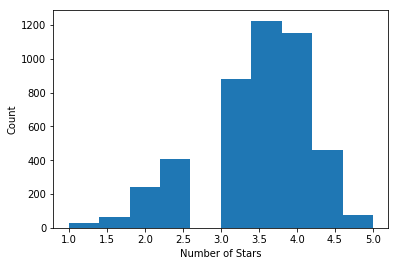

In [62]:
final_df['stars'].plot.hist()
plt.xlabel("Number of Stars")
plt.ylabel("Count")
plt.show()

Relation of ratings with total count of checkins in the restaurant-

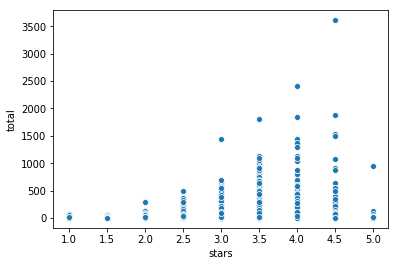

In [51]:
sns.scatterplot(x='stars',y='total',data=final_df)

Relation of ratings with count of reviews in the restaurant-

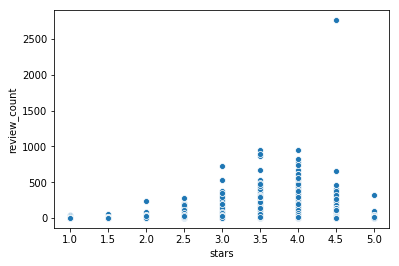

In [39]:
sns.scatterplot(x='stars',y='review_count',data=final_df)

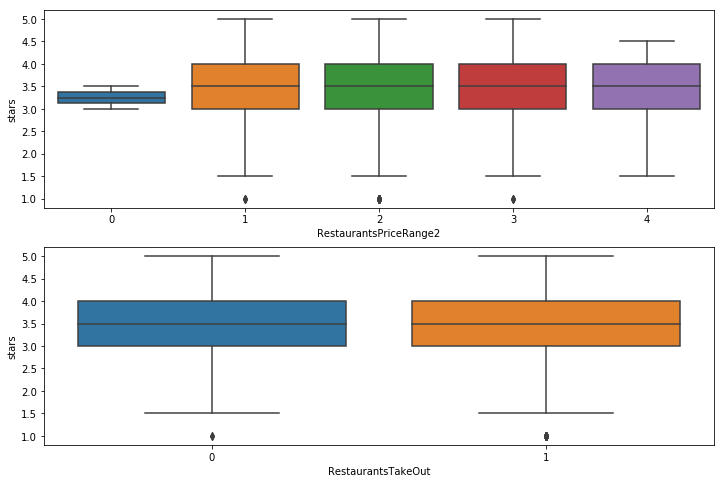

In [58]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))
sns.boxplot(x='RestaurantsPriceRange2',y='stars',data=final_df, ax=axarr[0])
sns.boxplot(x='RestaurantsTakeOut',y='stars',data=final_df, ax=axarr[1])

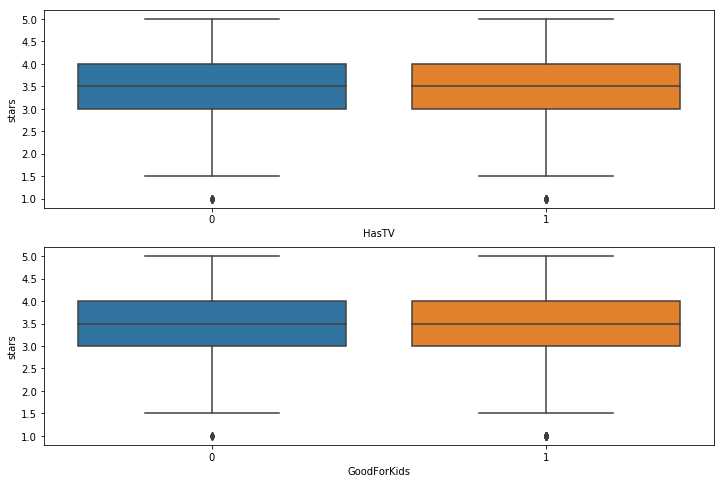

In [59]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))
sns.boxplot(x='HasTV',y='stars',data=final_df, ax=axarr[0])
sns.boxplot(x='GoodForKids',y='stars',data=final_df, ax=axarr[1])

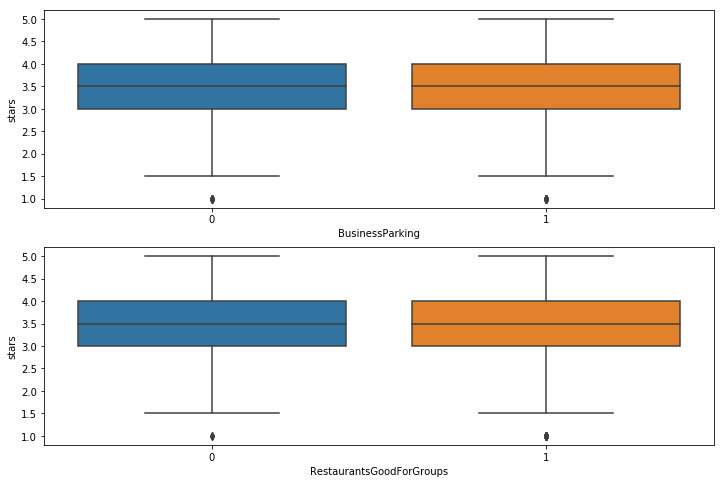

In [64]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))
sns.boxplot(x='BusinessParking',y='stars',data=final_df, ax=axarr[0])
sns.boxplot(x='RestaurantsGoodForGroups',y='stars',data=final_df, ax=axarr[1])

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

By analyzing different features available in the data, we found review_count and no. of checkins to be related to star ratings of restaurants.

Write codes to implement the solution in python:

In [65]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_df, test_size=0.2)

In [66]:
print(train.shape)
print(test.shape)

(3628, 17)
(907, 17)


In [68]:
from sklearn.linear_model import LinearRegression

X = train[['total','review_count']]
y = train['stars']
lm = LinearRegression()
model = lm.fit(X, y)

In [78]:
model.coef_

array([-0.00021114,  0.00162298])

In [71]:
test_X = test[['total','review_count']]
test_y = test['stars']
y_pred = model.predict(test_X)

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [83]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))


Mean Absolute Error: 0.5852516428543365
Mean Squared Error: 0.5784853796765896
Root Mean Squared Error: 0.7605822635827039


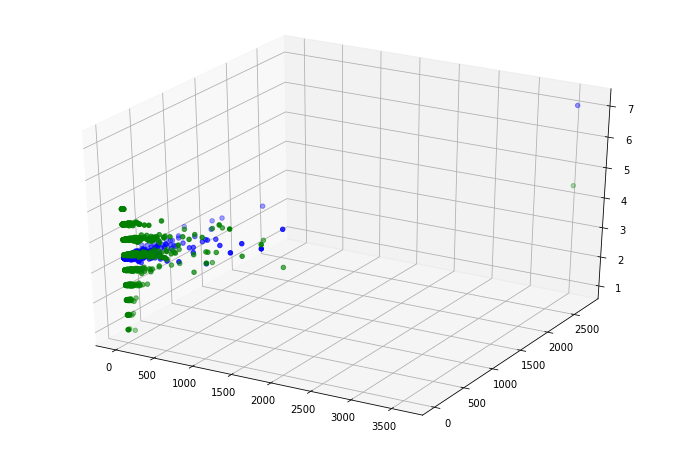

In [91]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x1 = test_X['total']
x2 = test_X['review_count']
ax.scatter3D(x1, x2, test_y, c = 'green');
ax.scatter3D(x1, x2, y_pred, c='blue');


plt.show()


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 7 minutes.

Please compress all the files in a zipped file.


**How to submit:**

        Please submit through Canvas, in the Assignment "Case Study 1".
        
**Note: Each team only needs to submit one submission in Canvas**


# Peer-Review Grading Template:

**Total Points: (100 points)** 

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) Finding the most popular business categories (5 points):
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (2) Find the most popular business objects (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    

        


